#SVM->support vector Machine

In [2]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("placement.csv")

In [6]:
df.head(2)

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0


In [8]:
x=df.drop(columns=['placed'])
y=df['placed']

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [14]:
from sklearn.svm import SVC

In [16]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [18]:
import matplotlib.pyplot as plt

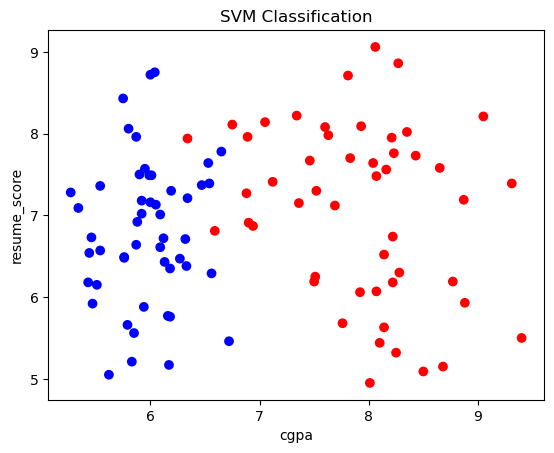

In [20]:
plt.scatter(x['cgpa'], x['resume_score'], c=y, cmap='bwr')
plt.title("SVM Classification")
plt.xlabel("cgpa")
plt.ylabel("resume_score")
plt.show()

In [22]:
from sklearn.metrics import accuracy_score 

In [24]:
y_pred = model.predict(x_test) 

In [26]:
accuracy_score(y_test , y_pred) 

1.0

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


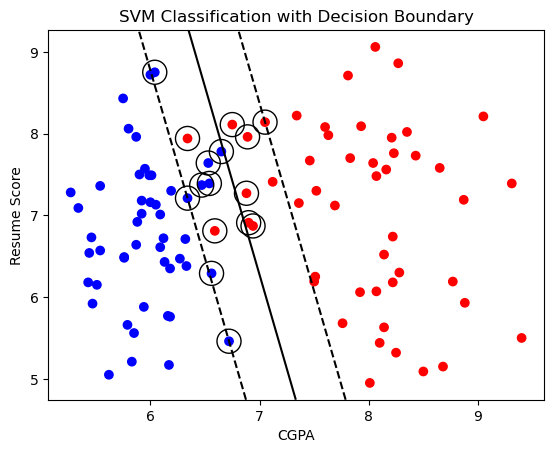

In [28]:
# Step 2: Plot the data points
plt.scatter(x['cgpa'], x['resume_score'], c=y, cmap='bwr')
plt.title("SVM Classification with Decision Boundary")
plt.xlabel("CGPA")
plt.ylabel("Resume Score")

# Step 3: Create a grid to evaluate the model
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

# Step 4: Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[0], linestyles=['-'])  # Decision boundary
plt.contour(XX, YY, Z, colors='k', levels=[-1, 1], linestyles=['--'])  # Margins

# Step 5: Show support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
            s=300, linewidth=1, facecolors='none', edgecolors='k')

plt.show()